<a href="https://colab.research.google.com/github/Rohan5076/practice-code/blob/main/Explore_American_Fast_Food_Restaurants_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import matplotlib.pyplot as plt # import matplotlib for graphs
import warnings 
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

fastfood_data=pd.read_csv("/content/drive/MyDrive/All CSV files-20220711T101939Z-001/fast food restaurnt/Datafiniti_Fast_Food_Restaurants_May19.csv",encoding='latin-1')
fastfood_data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/carls-jr-7001402,https://www.carlsjr.com/?utm_source=Yextandutm_medium=Visit%20Websiteandutm_campaign=Homepage
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,"http://www.citysearch.com/profile/772076870/grand_junction_co/del_taco.html,https://www.yellowpages.com/grand-junction-co/mip/del-taco-475739804,https://www.tripadvisor.com/Restaurant_Review-g3345...",http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/mip/which-wich-481453650,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chipotle-mexican-grill-537241840,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Restaurants",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco-bell-459444587,https://locations.tacobell.com/co/denver/5225-e-colfax-ave.html?utm_source=yextandutm_campaign=yextpowerlistingsandutm_medium=referralandutm_term=004051andutm_content=website


# 2. Let's take a peek at what we have

In [ ]:
# shape of dataset
print("Dataset dimension:")
print(fastfood_data.shape)

Dataset dimension:
(10000, 16)


In [ ]:
# check the data type of the columns
print("Data types:")
print(fastfood_data.dtypes)

Data types:
id                    object
dateAdded             object
dateUpdated           object
address               object
categories            object
primaryCategories     object
city                  object
country               object
keys                  object
latitude             float64
longitude            float64
name                  object
postalCode            object
province              object
sourceURLs            object
websites              object
dtype: object


In [ ]:
# take a peek
print("Top 10 rows:")
fastfood_data.head(10)

Top 10 rows:


,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.396290,-104.696990,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/carls-jr-7001402,https://www.carlsjr.com/?utm_source=Yextandutm_medium=Visit%20Websiteandutm_campaign=Homepage
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.081350,-108.586890,Del Taco,81505,CO,"http://www.citysearch.com/profile/772076870/grand_junction_co/del_taco.html,https://www.yellowpages.com/grand-junction-co/mip/del-taco-475739804,https://www.tripadvisor.com/Restaurant_Review-g3345...",http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.091480,-108.554110,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/mip/which-wich-481453650,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.763690,-104.776710,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chipotle-mexican-grill-537241840,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Restaurants",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.740440,-104.926360,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco-bell-459444587,https://locations.tacobell.com/co/denver/5225-e-colfax-ave.html?utm_source=yextandutm_campaign=yextpowerlistingsandutm_medium=referralandutm_term=004051andutm_content=website
5,AWrSaQ5RZ4Yw-wtdgcZw,2019-05-19T23:24:21Z,2019-05-19T23:24:21Z,1350 W Colfax Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants,Take Out Restaurants",Accommodation & Food Services,Denver,US,us/co/denver/1350wcolfaxavenue/-1161002137,39.739670,-105.004670,McDonald's,80204,CO,https://www.yellowpages.com/denver-co/mip/mcdonalds-14897523,https://www.mcdonalds.com/us/en-us/location/CO/DENVER/1350-W-COLFAX/23659.html?cid=RF:YXT:RoN::Clicks
6,AWrSaQ4EsVYjT2BJAy_I,2019-05-19T23:24:21Z,2019-05-19T23:24:21Z,200 16th Street,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants,Take Out Restaurants",Accommodation & Food Services,Denver,US,us/co/denver/20016thstreet/-1161002137,39.741700,-104.988290,McDonald's,80202,CO,https://www.yellowpages.com/denver-co/mip/mcdonalds-503963739,https://www.mcdonalds.com/us/en-us/location/CO/DENVER/200-16TH-ST/4267.html?cid=RF:YXT:RoN::Clicks
7,AWCvDUHSIxWefVJwvq4y,2018-01-01T00:01:02Z,2019-05-19T22:58:35Z,1772 N College Ave,"Restaurant,Carry-out food,Mexican Restaurants,Tex-mex restaurants,Southwestern restaurants,Fast Food Restaurant,Mexican restaurants,Karaoke,Fast Food Restaurants,Restaurants",Accommodation & Food Services,Fayetteville,US,us/ar/fayetteville/1772ncollegeave/-864103396,36.085369,-94.155319,Taco Bell,72703,AR,"http://www.insiderpages.com/b/3709775090/taco-bell-fayetteville-16,https://foursquare.com/v/taco-bell/4bce90f9937ca59398d1ae92,https://www.allmenus.com/ar/fayetteville/204759-taco-bell/menu/,https...","http://www.tacobell.com/,http://www.tacobell.com"
8,AWrSTT3sQTFama1Xpjyq,2019-05-19T22:53:58Z,2019-05-19T22:53:58Z,605 S Havana Street,"

# 3. Let's drop id, keys, sourceURLs, and websites first

In [ ]:
# the id, keys, sourceURLs, and websites are unique identifier
# we don't need them in our visualizations
fastfood_data = fastfood_data.drop(['id', 'keys', 'sourceURLs', 'websites'], axis=1)

# shape of dataset
print("Dimension after dropping columns:")
print(fastfood_data.shape)

# take a peek at the head to verify the drop is successful
fastfood_data.head()

Dimension after dropping columns:
(10000, 12)


,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,latitude,longitude,name,postalCode,province
0,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants",Accommodation & Food Services,Greeley,US,40.39629,-104.69699,Carl's Jr.,80631,CO
1,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants",Accommodation & Food Services,Grand Junction,US,39.08135,-108.58689,Del Taco,81505,CO
2,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Grand Junction,US,39.09148,-108.55411,Which Wich,81506,CO
3,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Aurora,US,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO
4,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Restaurants",Accommodation & Food Services,Denver,US,39.74044,-104.92636,Taco Bell,80220,CO


# 4. Let's check do we have missing data

In [ ]:
# my personal reusable function for detecting missing data
def missing_value_describe(data):
    # check missing values in training data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No misisng data!!!")
missing_value_describe(fastfood_data)

Number of columns with missing values: 0
No misisng data!!!


# Let's explore the data now!
Among the 12 columns we have:

1 column with fastfood restaraunt's **name:** [name]

2 **date** data columns: [dateAdded, dateUpdated]

2 fast food **category** columns: [categories, primaryCategories]

7 **location** data columns: [address, city, country, latitude, longtitude, postalCode, province]

In [ ]:
import matplotlib.pyplot as plt # import matplotlib for graphs

#**5. Restarant Names Exploration and Visualizations:**

#Question 0: How many fastfood restauraunts are recorded

In [ ]:
print("Number of unique restaurant:", fastfood_data['name'].nunique())

Number of unique restaurant: 1545


## Question 1: What are the top 20 recorded fastfood restaurant by count?

Text(0, 0.5, 'count')

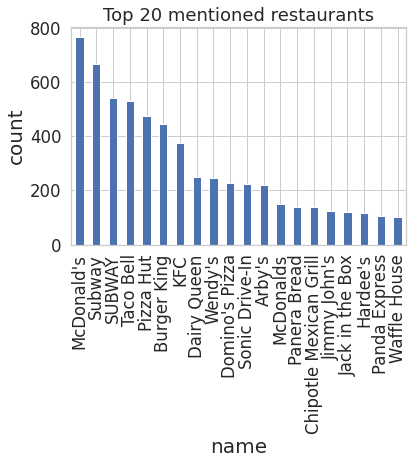

In [ ]:
# top 20 restaurants recorded by count total
nameplot=fastfood_data['name'].value_counts()[:20].plot.bar(title='Top 20 mentioned restaurants')
nameplot.set_xlabel('name',size=20)
nameplot.set_ylabel('count',size=20)

We can see that McDonald's, Subway, SUBWAY are the top3 mentioned places to eat fast food

**NLP: More data cleaning is needed!!!**

We can see there are "McDonald's" and "McDonalds" and "Subway" and "SUBWAY"

Let's apply NLTK's edit distance function to find the edit distance between those names

**Edit Distance:** The distance between the source string and the target string is the minimum number of edit operations (deletions, insertions, or substitutions) required to transform the source into the target. The lower the distance, the more similar the two strings.¶

In [ ]:
import nltk

In [ ]:
 # obtained unique names of restaurants
 restaurant_names = fastfood_data['name'].unique()

 # calculate similarity and record most-similar names together
 most_similar = []
 for i in range(len(restaurant_names)):
     # temporary list to store the current similar words
     temp_similar = [restaurant_names[i]]
    
     # compare and save similar words
     for j in range(len(restaurant_names)):
         if restaurant_names[i] == restaurant_names[j]:
             continue
         if nltk.edit_distance(restaurant_names[i].lower(), restaurant_names[j].lower()) < 3:
             temp_similar.append(restaurant_names[j])
            
     # similar word(s) found
     if len(temp_similar) > 1:
         most_similar.append(temp_similar)
     if i > 0 and i % 10 == 0:
         print("index", i-10, "-", i, "checking finished| most similar size:", len(most_similar))
 print("similarity checking finished")

 # count number of similar words
 most_similar_word_count = 0
 for i in most_similar:
     most_similar_word_count += len(i)
 print("size of the most similar list:", most_similar_word_count)
 most_similar

In [ ]:
 # let's remove the exceptions from the above most_similar's list
# since the list is small and we only need to do some minor changes, I will just do it manually
# to avoid running edit-distance again
most_similar_edited = [["Carl's Jr.", "Carl's Jr", 'Carls Jr'],
 ["McDonald's", "Mc Donald's", 'Mcdonalds', 'McDonalds'],
 ['Cook-Out', 'Cook Out', 'CookOut'],
 ["Steak 'n Shake",
  "STEAK 'N SHAKE",
  'Steak N Shake',
  'Steak n Shake',
  "Steak 'N Shake"],
 ['QDOBA Mexican Eats', 'Qdoba Mexican Eats'],
 ['Burger King', 'Burger King®'],
 ["Hardee's", 'Hardees'],
 ['Taco Time', 'TacoTime'],
 ["Arby's", 'Arbys'],
 ['Chick-fil-A', 'Chick-Fil-A', 'ChickfilA'],
 ['Subway', 'SUBWAY'],
 ['Kfc', 'KFC'],
 ["Jack's", 'Jacks'],
 ['Sonic Drive-In',
  'SONIC Drive-In',
  'SONIC Drive In',
  'Sonic DriveIn',
  'Sonic Drive-in'],
 ["Church's Chicken", 'Churchs Chicken'],
 ['Big Boys', 'Big Boy'],
 ['Dairy Queen', 'Dairy queen'],
 ['Guthries', "Guthrie's"],
 ['Chick-Fil-A', 'Chick-fil-A', 'ChickfilA'],
 ["Wendy's", 'Wendys'],
 ["Jimmy John's", 'Jimmy Johns'],
 ['Dairy Queen Grill Chill', 'Dairy Queen Grill & Chill'],
 ["Moe's Southwest Grill", 'Moes Southwest Grill'],
 ["Domino's Pizza", 'Dominos Pizza'],
 ["Rally's", 'Rallys'],
 ['Full Moon Bar-B-Que', 'Full Moon Bar B Que'],
 ["Guthrie's", 'Guthries'],
 ["McAlister's Deli", "Mcalister's Deli", 'McAlisters Deli'],
 ["Jason's Deli", 'Jasons Deli'],
 ['KFC', 'Kfc', 'KFC Kentucky Fried Chicken', 'KFC - Kentucky Fried Chicken'],
 ['Popeyes Louisiana Kitchen', "Popeye's Louisiana Kitchen"],
 ["Long John Silver's", 'Long John Silvers'],
 ['BLIMPIE', 'Blimpie'],
 ['Five Guys Burgers Fries', 'Five Guys Burgers & Fries'],
 ['SUBWAY', 'Subway'],
 ['Dairy Queen Grill & Chill', 'Dairy Queen Grill Chill'],
 ['Potbelly Sandwich Works', 'Pot Belly Sandwich Works'],
 ["Charley's Grilled Subs", 'Charleys Grilled Subs'],
 ["Jersey Mike's Subs", 'Jersey Mikes Subs'],
 ['In-N-Out Burger', 'InNOut Burger'],
 ["Culver's", "CULVER'S", 'Culvers'],
 ["Famous Dave's", 'Famous Daves'],
 ["Freddy's Frozen Custard Steakburgers",
  'Freddys Frozen Custard Steakburgers',
  "Freddy's Frozen Custard & Steakburgers"],
 ['Cook Out', 'Cook-Out', 'CookOut'],
 ['TacoTime', 'Taco Time'],
 ['Hooters', 'Roosters'],
 ['BurgerFi', 'Burgerfi'],
 ["Chen's Restaurant", "Chan's Restaurant"],
 ['Taco Del Mar', 'Taco del Mar'],
 ['SONIC Drive-In',
  'Sonic Drive-In',
  'SONIC Drive In',
  'Sonic DriveIn',
  'Sonic Drive-in'],
 ['Ciscos Taqueria', "Cisco's Taqueria"],
 ['China King', 'China Lin'],
 ["Bojangles' Famous Chicken 'n Biscuits",
  'Bojangles Famous Chicken n Biscuits'],
 ["Dominic's of New York", 'Dominics of New York'],
 ["Papa John's Pizza", 'Papa Johns Pizza'],
 ['Chanellos Pizza', 'Chanello’s Pizza'],
 ["Fazoli's", 'Fazolis'],
 ['Wing Street', 'Wingstreet'],
 ["George's Gyros Spot", "George's Gyros Spot 2"],
 ['Taco Johns', "Taco John's"],
 ['RUNZA', 'Runza'],
 ['Bru Burger Bar', 'Grub Burger Bar'],
 ["Taco John's", 'Taco Johns'],
 ["Bob's Burger Brew", "Bob's Burgers Brew", "Bob's Burgers Brew", "Bob's Burger Brew"],
 ['Best Burgers', 'Best Burger'],
 ['Burgermaster', 'Burger Master'],
 ["Dick's Drive-In", "DK's Drive-In"],
 ["Charley's Grill Spirits", "Charley's Grill & Spirits"],
 ['Tom Drive-in', "Tom's Drive-In"],
 ["Fox's Pizza Den", 'Foxs Pizza Den'],
 ["Mc Donald's", "McDonald's", 'Mcdonalds', 'McDonalds'],
 ['Taco CASA', 'Taco Casa'],
 ["Mcalister's Deli", "McAlister's Deli", 'McAlisters Deli'],
 ['Saras Too', "Sara's Too"],
 ['Backyard Burgers', 'Back Yard Burgers'],
 ["CULVER'S", "Culver's", 'Culvers'],
 ["Simple Simon's Pizza", 'Simple Simons Pizza'],
 ['China Sea', 'China Star', 'China Bear'],
 ["Dino's Drive In", "Dan's Drive In"],
 ["STEAK 'N SHAKE",
  "Steak 'n Shake",
  'Steak N Shake',
  'Steak n Shake',
  "Steak 'N Shake"],
 ['Stanfields Steak House', "Stanfield's Steakhouse"],
 ['Wingstreet', 'Wing Street'],
 ["Big Billy's Burger Joint", 'Big Billys Burger Joint'],
 ['Big Boy', 'Big Boys'],
 ["Frisch's Big Boy Restaurant", "1 Frisch's Big Boy Restaurant", 
  "40 Frisch's Big Boy Restaurant", "1 Frisch's Big Boy Restaurant",
  "90 Frisch's Big Boy Restaurant"],
 ['Fireplace Restaurant Lounge', 'Fireplace Restaurant & Lounge'],
 ["Carl's Jr", "Carl's Jr.", 'Carls Jr'],
 ["Rick's on the River", 'Ricks on the River'],
 ['Grub Burger Bar', 'Bru Burger Bar'],
 ["Franky's", "Grandy's"],
 ['Gyro X-Press', 'Gyro Express'],
 ['Dominos Pizza', "Domino's Pizza"],
 ["Pietro's Pizza Gallery of Games", "Pietro's Pizza & Gallery of Games"],
 ['Burrtio Amigos', 'Burrito Amigos'],
 ["Albee's Ny Gyros", "Albee's NY Gyros"],
 ['Gyro Stop', 'Gyro Spot'],
 ['Nicholas Restaurant', "Nicholas' Restaurant"],
 ['Mcdonalds', "McDonald's", "Mc Donald's", 'McDonalds'],
 ['Burgerfi', 'BurgerFi'],
 ["Ryan's", 'Ryans'],
 ['Taste of Buffalo Pizzeria', 'Taste Of Buffalo Pizzeria'],
 ['Bad Daddys Burger Bar', "Bad Daddy's Burger Bar"],
 ["Zaxby's", "Arby's"],
 ["Topper's Pizza", 'Toppers Pizza'],
 ['C J Drive In', 'C & J Drive In'],
 ['Full Moon Bar B Que', 'Full Moon Bar-B-Que'],
 ['China Lin', 'China King'],
 ["Raising Cane's Chicken Fingers", 'Raising Canes Chicken Fingers'],
 ["Mary's Pizza Shack", 'Marys Pizza Shack'],
 ['Peking Chinese Restaurants', 'Peking Chinese Restaurant'],
 ['Arbys', "Arby's"],
 ['SONIC Drive In',
  'Sonic Drive-In',
  'SONIC Drive-In',
  'Sonic DriveIn',
  'Sonic Drive-in'],
 ['Hardees', "Hardee's"],
 ['McDonalds', "McDonald's", "Mc Donald's", 'Mcdonalds'],
 ['Wendys', "Wendy's"],
 ['Papa Johns Pizza', "Papa John's Pizza"],
 ["George's Gyros Spot 2", "George's Gyros Spot"],
 ['ChickfilA', 'Chick-fil-A', 'Chick-Fil-A'],
 ['Rallys', "Rally's"],
 ['C & J Drive In', 'C J Drive In'],
 ['Steak N Shake',
  "Steak 'n Shake",
  "STEAK 'N SHAKE",
  'Steak n Shake',
  "Steak 'N Shake"],
 ["Popeye's Louisiana Kitchen", 'Popeyes Louisiana Kitchen'],
 ["DJ's Drive-In", "DK's Drive-In"],
 ["Dan's Drive In", "Dino's Drive In"],
 ['Best Burger', 'Best Burgers', 'Beef Burger'],
 ['Jimmy Johns', "Jimmy John's"],
 ['BaskinRobbins', 'Baskin-Robbins', 'Baskin Robbins'],
 ['Carls Jr', "Carl's Jr.", "Carl's Jr"],
 ['WG Grinders', 'Wg Grinders'],
 ['McAlisters Deli', "McAlister's Deli", "Mcalister's Deli"],
 ['Fazolis', "Fazoli's"],
 ['Marys Pizza Shack', "Mary's Pizza Shack"],
 ['Bojangles Famous Chicken n Biscuits',
  "Bojangles' Famous Chicken 'n Biscuits"],
 ['Jacks', "Jack's"],
 ["Hardee's/red Burrito", 'Hardees Red Burrito', "Hardee's/Red Burrito"],
 ['Captain Ds', "Captain D'S"],
 ['Mr Hero', 'Mr. Hero'],
 ["Chan's Restaurant", "Chen's Restaurant"],
 ['Ritters Frozen Custard', "Ritter's Frozen Custard"],
 ['Hot Dog on a Stick', 'Hot Dog On A Stick'],
 ['Jersey Mikes Subs', "Jersey Mike's Subs"],
 ['AW Restaurants',
  'Aw Restaurants',
  'AWRestaurants',
  'A W Restaurant',
  'AW Restaurant',
  'Jam Restaurants'],
 ['Long John Silvers', "Long John Silver's"],
 ["Rally's Hamburgers", 'Rallys Hamburgers'],
 ['HomeTown Buffet', 'Hometown Buffet'],
 ['Back Yard Burgers', 'Backyard Burgers'],
 ['Hardees Red Burrito', "Hardee's/red Burrito", "Hardee's/Red Burrito"],
 ["DK's Drive-In", "Dick's Drive-In", "DJ's Drive-In", "K's Drive In"],
 ['Baskin-Robbins', 'BaskinRobbins', 'Baskin Robbins'],
 ['Churchs Chicken', "Church's Chicken"],
 ['Blimpie', 'BLIMPIE'],
 ['Foxs Pizza Den', "Fox's Pizza Den"],
 ['Steak n Shake',
  "Steak 'n Shake",
  "STEAK 'N SHAKE",
  'Steak N Shake',
  "Steak 'N Shake"],
 ['Rallys Hamburgers', "Rally's Hamburgers"],
 ['Sonic DriveIn',
  'Sonic Drive-In',
  'SONIC Drive-In',
  'SONIC Drive In',
  'Sonic Drive-in'],
 ['Famous Daves', "Famous Dave's"],
 ['Beef Burger', 'Best Burger'],
 ['Dominics of New York', "Dominic's of New York"],
 ['Z-Pizza', 'zpizza'],
 ['KFC - Kentucky Fried Chicken', 'KFC Kentucky Fried Chicken'],
 ["Rockne's", 'Rocknes'],
 ["Hardee's/Red Burrito", "Hardee's/red Burrito", 'Hardees Red Burrito'],
 ['Aw Restaurants',
  'AW Restaurants',
  'AWRestaurants',
  'A W Restaurant',
  'AW Restaurant',
  'Jam Restaurants'],
 ['AWRestaurants', 'AW Restaurants', 'Aw Restaurants', 'AW Restaurant'],
 ["Hardee's Restaurant", "Hardee's Restaurants"],
 ["Hardee's Restaurants", "Hardee's Restaurant"],
 ["Stanfield's Steakhouse", 'Stanfields Steak House'],
 ['Dunkin Donuts', "Dunkin' Donuts"],
 ['Einstein Bros. Bagels', 'Einstein Bros Bagels'],
 ['Simple Simons Pizza', "Simple Simon's Pizza"],
 ['A W Restaurant', 'AW Restaurants', 'Aw Restaurants', 'AW Restaurant'],
 ['Einstein Bros Bagels', 'Einstein Bros. Bagels'],
 ['Roosters', 'Hooters'],
 ['Culvers', "Culver's", "CULVER'S"],
 ['Slice of Life', 'Slice Of Life'],
 ['Jasons Deli', "Jason's Deli"],
 ['Wg Grinders', 'WG Grinders'],
 ['Charleys Grilled Subs', "Charley's Grilled Subs"],
 ['Freddys Frozen Custard Steakburgers',
  "Freddy's Frozen Custard Steakburgers"],
 ['Moes Southwest Grill', "Moe's Southwest Grill"],
 ['CookOut', 'Cook-Out', 'Cook Out'],
 ['Peking Chinese Restaurant', 'Peking Chinese Restaurants'],
 ['InNOut Burger', 'In-N-Out Burger'],
 ["Nicholas' Restaurant", 'Nicholas Restaurant'],
 ['Chanello’s Pizza', 'Chanellos Pizza'],
 ['Ryans', "Ryan's"],
 ['Burger King®', 'Burger King'],
 ['Toppers Pizza', "Topper's Pizza"],
 ["Albee's NY Gyros", "Albee's Ny Gyros"],
 ['Qdoba Mexican Eats', 'QDOBA Mexican Eats'],
 ['Runza', 'RUNZA'],
 ['Slice Of Life', 'Slice of Life'],
 ['Mai-Tai Restaurant', 'Mai Tai Restaurant'],
 ['Gyro Express', 'Gyro X-Press'],
 ['zpizza', 'Z-Pizza'],
 ['Raising Canes Chicken Fingers', "Raising Cane's Chicken Fingers"],
 ['Rocknes', "Rockne's"],
 ['LL Hawaiian Barbecue', 'L L Hawaiian Barbecue', 'L L Hawaiian Barbeque'],
 ['Dairy queen', 'Dairy Queen'],
 ['Blakes Lotaburger', "Blake's Lotaburger"],
 ['Emidio & Sons Italian Restaurant', 'Emidio Sons Italian Restaurant'],
 ['Taste Of Buffalo Pizzeria', 'Taste of Buffalo Pizzeria'],
 ['L L Hawaiian Barbecue',
  'LL Hawaiian Barbecue',
  'L L Hawaiian Barbeque',
  'L & L Hawaiian Barbecue'],
 ['Killer Burgers', 'Killer Burger'],
 ["Steak 'N Shake",
  "Steak 'n Shake",
  "STEAK 'N SHAKE",
  'Steak N Shake',
  'Steak n Shake'],
 ['Burrito Amigos', 'Burrtio Amigos'],
 ["Zack's Hamburgers", "Jack's Hamburgers"],
 ['AW Restaurant',
  'AW Restaurants',
  'Aw Restaurants',
  'AWRestaurants',
  'A W Restaurant'],
 ['Jam Restaurants', 'AW Restaurants', 'Aw Restaurants'],
 ['Big Billys Burger Joint', "Big Billy's Burger Joint"],
 ['L L Hawaiian Barbeque', 'LL Hawaiian Barbecue', 'L L Hawaiian Barbecue'],
 ["Ritter's Frozen Custard", 'Ritters Frozen Custard'],
 ["Pietro's Pizza & Gallery of Games", "Pietro's Pizza Gallery of Games"],
 ["K's Drive In", "DK's Drive-In"],
 ['Killer Burger', 'Killer Burgers'],
 ["Dunkin' Donuts", 'Dunkin Donuts'],
 ['Farlows on the Water', "Farlow's On The Water"],
 ['Hometown Buffet', 'HomeTown Buffet'],
 ["Blake's Lotaburger", 'Blakes Lotaburger'],
 ["Jack's Hamburgers", "Zack's Hamburgers"],
 ["Cisco's Taqueria", 'Ciscos Taqueria'],
 ["Grandy's", "Franky's"],
 ["Farlow's On The Water", 'Farlows on the Water'],
 ["Bad Daddy's Burger Bar", 'Bad Daddys Burger Bar'],
 ['Baskin Robbins', 'BaskinRobbins', 'Baskin-Robbins'],
 ["Sara's Too", 'Saras Too'],
 ['T & L Hotdogs', 'T & L Hot Dogs'],
 ["Tom's Drive-In", 'Tom Drive-in'],
 ['Sonic Drive-in',
  'Sonic Drive-In',
  'SONIC Drive-In',
  'SONIC Drive In',
  'Sonic DriveIn'],
 ['Taco Casa', 'Taco CASA'],
 ['Emidio Sons Italian Restaurant', 'Emidio & Sons Italian Restaurant'],
 ['Fireplace Restaurant & Lounge', 'Fireplace Restaurant Lounge'],
 ['Mai Tai Restaurant', 'Mai-Tai Restaurant'],
 ['Ricks on the River', "Rick's on the River"],
 ['Taco del Mar', 'Taco Del Mar'],
 ['Five Guys Burgers & Fries', 'Five Guys Burgers Fries'],
 ['Mr. Hero', 'Mr Hero'],
 ["Captain D'S", 'Captain Ds'],
 ['Gyro Spot', 'Gyro Stop'],
 ["Charley's Grill & Spirits", "Charley's Grill Spirits"],
 ['Hot Dog On A Stick', 'Hot Dog on a Stick'],
 ['L & L Hawaiian Barbecue', 'L L Hawaiian Barbecue'],
 ['Pot Belly Sandwich Works', 'Potbelly Sandwich Works'],
 ['Burger Master', 'Burgermaster'],
 ["Freddy's Frozen Custard & Steakburgers",
  "Freddy's Frozen Custard Steakburgers"]]

In [ ]:
# let's sort them by the first element of each sublist
def sortFirst(val): 
    return val[0]  

# sorts the array in ascending according to 1st element 
most_similar_edited.sort(key = sortFirst)  
most_similar_edited

[['A W Restaurant', 'AW Restaurants', 'Aw Restaurants', 'AW Restaurant'],
 ['AW Restaurant',
  'AW Restaurants',
  'Aw Restaurants',
  'AWRestaurants',
  'A W Restaurant'],
 ['AW Restaurants',
  'Aw Restaurants',
  'AWRestaurants',
  'A W Restaurant',
  'AW Restaurant',
  'Jam Restaurants'],
 ['AWRestaurants', 'AW Restaurants', 'Aw Restaurants', 'AW Restaurant'],
 ["Albee's NY Gyros", "Albee's Ny Gyros"],
 ["Albee's Ny Gyros", "Albee's NY Gyros"],
 ["Arby's", 'Arbys'],
 ['Arbys', "Arby's"],
 ['Aw Restaurants',
  'AW Restaurants',
  'AWRestaurants',
  'A W Restaurant',
  'AW Restaurant',
  'Jam Restaurants'],
 ['BLIMPIE', 'Blimpie'],
 ['Back Yard Burgers', 'Backyard Burgers'],
 ['Backyard Burgers', 'Back Yard Burgers'],
 ["Bad Daddy's Burger Bar", 'Bad Daddys Burger Bar'],
 ['Bad Daddys Burger Bar', "Bad Daddy's Burger Bar"],
 ['Baskin Robbins', 'BaskinRobbins', 'Baskin-Robbins'],
 ['Baskin-Robbins', 'BaskinRobbins', 'Baskin Robbins'],
 ['BaskinRobbins', 'Baskin-Robbins', 'Baskin Robbin

The reason why I also track similar words for words that have already be recorded is because examples like this can derive more unseen but similar words.

['L & L Hawaiian Barbecue', 'L L Hawaiian Barbecue'],

['L L Hawaiian Barbecue', 'LL Hawaiian Barbecue', 'L L Hawaiian Barbeque', 'L & L Hawaiian Barbecue']

In [ ]:
# let's process the data second time manually to make the data cleaner
most_similar_sorted = [
 ['AW Restaurant', 'AW Restaurants', 'Aw Restaurants', 'A W Restaurant', 'AWRestaurants'],
 ["Albee's NY Gyros", "Albee's Ny Gyros"],
 ["Arby's", 'Arbys'],
 ['BLIMPIE', 'Blimpie'],
 ['Back Yard Burgers', 'Backyard Burgers'],
 ["Bad Daddy's Burger Bar", 'Bad Daddys Burger Bar'],
 ['Baskin Robbins', 'BaskinRobbins', 'Baskin-Robbins'],
 ['Best Burgers', 'Best Burger'],
 ["Big Billy's Burger Joint", 'Big Billys Burger Joint'],
 ['Big Boy', 'Big Boys'],
 ["Blake's Lotaburger", 'Blakes Lotaburger'],
 ['Blimpie', 'BLIMPIE'],
 ["Bob's Burger Brew",
  "Bob's Burgers Brew"],
 ['Bojangles Famous Chicken n Biscuits',
  "Bojangles' Famous Chicken 'n Biscuits"],
 ['Burger King', 'Burger King®'],
 ['Burger Master', 'Burgermaster'],
 ['BurgerFi', 'Burgerfi'],
 ['Burgermaster', 'Burger Master'],
 ['Burrito Amigos', 'Burrtio Amigos'],
 ['C & J Drive In', 'C J Drive In'],
 ["CULVER'S", "Culver's", 'Culvers'],
 ["Captain D'S", 'Captain Ds'],
 ["Carl's Jr", "Carl's Jr.", 'Carls Jr'],
 ["Chan's Restaurant", "Chen's Restaurant"],
 ['Chanellos Pizza', 'Chanello’s Pizza'],
 ["Charley's Grill & Spirits", "Charley's Grill Spirits"],
 ["Charley's Grilled Subs", 'Charleys Grilled Subs'],
 ["Chen's Restaurant", "Chan's Restaurant"],
 ['Chick-Fil-A', 'Chick-fil-A', 'ChickfilA'],
 ['China Sea', 'China Star', 'China Bear'],
 ["Church's Chicken", 'Churchs Chicken'],
 ["Cisco's Taqueria", 'Ciscos Taqueria'],
 ['Cook Out', 'Cook-Out', 'CookOut'],
 ["Culver's", "CULVER'S", 'Culvers'],
 ['Dairy Queen', 'Dairy queen'],
 ['Dairy Queen Grill & Chill', 'Dairy Queen Grill Chill'],
 ["Dominic's of New York", 'Dominics of New York'],
 ["Domino's Pizza", 'Dominos Pizza'],
 ['Dunkin Donuts', "Dunkin' Donuts"],
 ['Einstein Bros Bagels', 'Einstein Bros. Bagels'],
 ['Emidio & Sons Italian Restaurant', 'Emidio Sons Italian Restaurant'],
 ["Famous Dave's", 'Famous Daves'],
 ["Farlow's On The Water", 'Farlows on the Water'],
 ["Fazoli's", 'Fazolis'],
 ['Fireplace Restaurant & Lounge', 'Fireplace Restaurant Lounge'],
 ['Five Guys Burgers & Fries', 'Five Guys Burgers Fries'],
 ["Fox's Pizza Den", 'Foxs Pizza Den'],
 ["Freddy's Frozen Custard & Steakburgers",
  'Freddys Frozen Custard Steakburgers',
  "Freddy's Frozen Custard Steakburgers"],
 ["Frisch's Big Boy Restaurant",
  "1 Frisch's Big Boy Restaurant",
  "40 Frisch's Big Boy Restaurant",
  "1 Frisch's Big Boy Restaurant",
  "90 Frisch's Big Boy Restaurant"],
 ['Full Moon Bar B Que', 'Full Moon Bar-B-Que'],
 ["George's Gyros Spot", "George's Gyros Spot 2"],
 ['Grub Burger Bar', 'Bru Burger Bar'],
 ["Guthrie's", 'Guthries'],
 ['Gyro Express', 'Gyro X-Press'],
 ['Gyro Spot', 'Gyro Stop'],
 ["Hardee's", 'Hardees'],
 ["Hardee's Restaurant", "Hardee's Restaurants"],
 ["Hardee's/Red Burrito", "Hardee's/red Burrito", 'Hardees Red Burrito'],
 ['HomeTown Buffet', 'Hometown Buffet'],
 ['Hooters', 'Roosters'],
 ['Hot Dog On A Stick', 'Hot Dog on a Stick'],
 ['In-N-Out Burger', 'InNOut Burger'],
 ["Jack's", 'Jacks'],
 ["Jack's Hamburgers", "Zack's Hamburgers"],
 ["Jason's Deli", 'Jasons Deli'],
 ["Jersey Mike's Subs", 'Jersey Mikes Subs'],
 ["Jimmy John's", 'Jimmy Johns'],
 ['KFC', 'Kfc', 'KFC Kentucky Fried Chicken', 'KFC - Kentucky Fried Chicken'],
 ['Killer Burger', 'Killer Burgers'],
 ['L & L Hawaiian Barbecue', 'L L Hawaiian Barbecue',
  'LL Hawaiian Barbecue'],
 ["Long John Silver's", 'Long John Silvers'],
 ['Mai Tai Restaurant', 'Mai-Tai Restaurant'],
 ["Mary's Pizza Shack", 'Marys Pizza Shack'],
 ["Mc Donald's", "McDonald's", 'Mcdonalds', 'McDonalds'],
 ["McAlister's Deli", "Mcalister's Deli", 'McAlisters Deli'],
 ["Moe's Southwest Grill", 'Moes Southwest Grill'],
 ['Mr Hero', 'Mr. Hero'],
 ['Nicholas Restaurant', "Nicholas' Restaurant"],
 ["Papa John's Pizza", 'Papa Johns Pizza'],
 ['Peking Chinese Restaurant', 'Peking Chinese Restaurants'],
 ["Pietro's Pizza & Gallery of Games", "Pietro's Pizza Gallery of Games"],
 ["Popeye's Louisiana Kitchen", 'Popeyes Louisiana Kitchen'],
 ['Pot Belly Sandwich Works', 'Potbelly Sandwich Works'],
 ['QDOBA Mexican Eats', 'Qdoba Mexican Eats'],
 ['RUNZA', 'Runza'],
 ["Raising Cane's Chicken Fingers", 'Raising Canes Chicken Fingers'],
 ["Rally's", 'Rallys'],
 ["Rally's Hamburgers", 'Rallys Hamburgers'],
 ["Rick's on the River", 'Ricks on the River'],
 ["Ritter's Frozen Custard", 'Ritters Frozen Custard'],
 ["Rockne's", 'Rocknes'],
 ['Roosters', 'Hooters'],
 ['Runza', 'RUNZA'],
 ["Ryan's", 'Ryans'],
 ['SONIC Drive In',
  'Sonic Drive-In',
  'SONIC Drive-In',
  'Sonic DriveIn',
  'Sonic Drive-in'],
 ["STEAK 'N SHAKE",
  "Steak 'n Shake",
  'Steak N Shake',
  'Steak n Shake',
  "Steak 'N Shake"],
 ['SUBWAY', 'Subway'],
 ["Sara's Too", 'Saras Too'],
 ["Simple Simon's Pizza", 'Simple Simons Pizza'],
 ['Slice Of Life', 'Slice of Life'],
 ["Stanfield's Steakhouse", 'Stanfields Steak House'],
 ['T & L Hotdogs', 'T & L Hot Dogs'],
 ['Taco CASA', 'Taco Casa'],
 ['Taco Del Mar', 'Taco del Mar'],
 ["Taco John's", 'Taco Johns'],
 ['Taco Time', 'TacoTime'],
 ['Taste Of Buffalo Pizzeria', 'Taste of Buffalo Pizzeria'],
 ['Tom Drive-in', "Tom's Drive-In"],
 ["Topper's Pizza", 'Toppers Pizza'],
 ['WG Grinders', 'Wg Grinders'],
 ["Wendy's", 'Wendys'],
 ['Wg Grinders', 'WG Grinders'],
 ['Wing Street', 'Wingstreet'],
 ['Z-Pizza', 'zpizza'],
 ["Zack's Hamburgers", "Jack's Hamburgers"]]
print("cleaned, matched restaurant name count:", len(most_similar_sorted))


cleaned, matched restaurant name count: 115


Now, let's replace the matched names in our original dataset

In [ ]:
# let's create a dictionary to make name replace easier
match_name_dict = {}
for row in most_similar_sorted:
    for similar_word in row:
        match_name_dict[similar_word] = row[0]
match_name_dict

{'AW Restaurant': 'AW Restaurant',
 'AW Restaurants': 'AW Restaurant',
 'Aw Restaurants': 'AW Restaurant',
 'A W Restaurant': 'AW Restaurant',
 'AWRestaurants': 'AW Restaurant',
 "Albee's NY Gyros": "Albee's NY Gyros",
 "Albee's Ny Gyros": "Albee's NY Gyros",
 "Arby's": "Arby's",
 'Arbys': "Arby's",
 'BLIMPIE': 'Blimpie',
 'Blimpie': 'Blimpie',
 'Back Yard Burgers': 'Back Yard Burgers',
 'Backyard Burgers': 'Back Yard Burgers',
 "Bad Daddy's Burger Bar": "Bad Daddy's Burger Bar",
 'Bad Daddys Burger Bar': "Bad Daddy's Burger Bar",
 'Baskin Robbins': 'Baskin Robbins',
 'BaskinRobbins': 'Baskin Robbins',
 'Baskin-Robbins': 'Baskin Robbins',
 'Best Burgers': 'Best Burgers',
 'Best Burger': 'Best Burgers',
 "Big Billy's Burger Joint": "Big Billy's Burger Joint",
 'Big Billys Burger Joint': "Big Billy's Burger Joint",
 'Big Boy': 'Big Boy',
 'Big Boys': 'Big Boy',
 "Blake's Lotaburger": "Blake's Lotaburger",
 'Blakes Lotaburger': "Blake's Lotaburger",
 "Bob's Burger Brew": "Bob's Burger Bre

In [ ]:
# let's use the match_name_dict to replace names in the dataset to make it cleaner
names = fastfood_data['name'].values
print("size:", len(names))

# replace names with their dictionary value
for i in range(len(names)):
    if match_name_dict.get(names[i]) != None:
        names[i] = match_name_dict[names[i]]

fastfood_data['names'] = names

size: 10000


Number of unique restaurant: 1415


Text(0, 0.5, 'count')

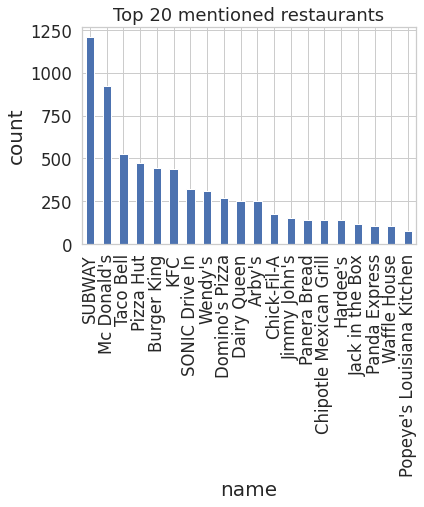

In [ ]:
# top 20 restaurants recorded by count total
print("Number of unique restaurant:", fastfood_data['name'].nunique())
nameplot = fastfood_data['name'].value_counts()[:20].plot.bar(title='Top 20 mentioned restaurants')
nameplot.set_xlabel('name',size=20)
nameplot.set_ylabel('count',size=20)

In [ ]:
fastfood_data.head()

,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,latitude,longitude,name,postalCode,province,names,detailed_address
0,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants",Accommodation & Food Services,Greeley,US,40.39629,-104.69699,Carl's Jr,80631,CO,Carl's Jr,Carl's Jr2555 11th AvenueGreeleyUS40.39629-104.6969980631CO
1,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants",Accommodation & Food Services,Grand Junction,US,39.08135,-108.58689,Del Taco,81505,CO,Del Taco,Del Taco2513 Highway 6 And 50Grand JunctionUS39.08135-108.5868981505CO
2,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Grand Junction,US,39.09148,-108.55411,Which Wich,81506,CO,Which Wich,Which Wich1125 Patterson RoadGrand JunctionUS39.09148-108.5541181506CO
3,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Aurora,US,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,Chipotle Mexican Grill,Chipotle Mexican Grill3455 N Salida CourtAuroraUS39.76369-104.7767180011CO
4,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Restaurants",Accommodation & Food Services,Denver,US,39.74044,-104.92636,Taco Bell,80220,CO,Taco Bell,Taco Bell5225 E Colfax AvenueDenverUS39.74044-104.9263680220CO


In [ ]:
df=fastfood_data

In [ ]:
# address, city, country, lattitude, longitude, name, postal code, province, website
df["detailed_address"] = df["names"] + df["address"]+  df["city"] + df["country"]+ df["latitude"].astype(str) + df["longitude"].astype(str)+ df["postalCode"] +df["province"]


In [ ]:
df = df[["detailed_address","categories"]]

In [ ]:
df.head()

,detailed_address,categories
0,Carl's Jr2555 11th AvenueGreeleyUS40.39629-104.6969980631CO,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants"
1,Del Taco2513 Highway 6 And 50Grand JunctionUS39.08135-108.5868981505CO,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants"
2,Which Wich1125 Patterson RoadGrand JunctionUS39.09148-108.5541181506CO,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants"
3,Chipotle Mexican Grill3455 N Salida CourtAuroraUS39.76369-104.7767180011CO,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants"
4,Taco Bell5225 E Colfax AvenueDenverUS39.74044-104.9263680220CO,"Fast Food Restaurants,Mexican Restaurants,Restaurants"


In [ ]:
df["categories"] = df["categories"].map(lambda x: x.lower())
df.head(10)

,detailed_address,categories
0,Carl's Jr2555 11th AvenueGreeleyUS40.39629-104.6969980631CO,"fast food restaurants,hamburgers and hot dogs,restaurants"
1,Del Taco2513 Highway 6 And 50Grand JunctionUS39.08135-108.5868981505CO,"restaurant,mexican restaurants,fast food restaurants,restaurants"
2,Which Wich1125 Patterson RoadGrand JunctionUS39.09148-108.5541181506CO,"sandwich shops,fast food restaurants,restaurants,take out restaurants"
3,Chipotle Mexican Grill3455 N Salida CourtAuroraUS39.76369-104.7767180011CO,"fast food restaurants,mexican restaurants,restaurants,take out restaurants"
4,Taco Bell5225 E Colfax AvenueDenverUS39.74044-104.9263680220CO,"fast food restaurants,mexican restaurants,restaurants"
5,Mc Donald's1350 W Colfax AvenueDenverUS39.73967-105.0046780204CO,"fast food restaurants,hamburgers and hot dogs,restaurants,take out restaurants"
6,Mc Donald's200 16th StreetDenverUS39.7417-104.9882980202CO,"fast food restaurants,hamburgers and hot dogs,restaurants,take out restaurants"
7,Taco Bell1772 N College AveFayettevilleUS36.085369-94.15531972703AR,"restaurant,carry-out food,mexican restaurants,tex-mex restaurants,southwestern restaurants,fast food restaurant,mexican restaurants,karaoke,fast food restaurants,restaurants"
8,Captain D's Seafood Kitchen605 S Havana StreetAuroraUS39.70534-104.8663380012CO,"fast food restaurants,american restaurants,family style restaurants,restaurants,seafood restaurants"
9,Shondiz16th Glenarm PlaceDenverUS39.749107-104.9945980202CO,"mexican restaurants,caterers,greek restaurants,mediterranean restaurants,latin american restaurants,fast food restaurants,restaurants"


In [ ]:
df1=df

In [ ]:
df1.head(5)

,detailed_address,categories
0,Carl's Jr2555 11th AvenueGreeleyUS40.39629-104.6969980631CO,"fast food restaurants,hamburgers and hot dogs,restaurants"
1,Del Taco2513 Highway 6 And 50Grand JunctionUS39.08135-108.5868981505CO,"restaurant,mexican restaurants,fast food restaurants,restaurants"
2,Which Wich1125 Patterson RoadGrand JunctionUS39.09148-108.5541181506CO,"sandwich shops,fast food restaurants,restaurants,take out restaurants"
3,Chipotle Mexican Grill3455 N Salida CourtAuroraUS39.76369-104.7767180011CO,"fast food restaurants,mexican restaurants,restaurants,take out restaurants"
4,Taco Bell5225 E Colfax AvenueDenverUS39.74044-104.9263680220CO,"fast food restaurants,mexican restaurants,restaurants"


In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [ ]:
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'restaurants')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'carry-out food')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'karaoke')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'take out')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'caterers')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'family style restaurants')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'delicatessens')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'restaurant')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'home delivery beer and beverages')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'delivery service')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'sports bar')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'family style')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'place')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], '&')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], "women's clothing")
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'bars')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'southwestern')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'joint')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'hotel and motel reservations')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'banquet halls & reception facilities')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'delis')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'service stations')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'stands')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'fraternal organizations')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'tourism')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'shops')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'cocktail lounges')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'cypress station')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'family friendly')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'convenience stores')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'bar and grills')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'food delivery')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'manufacturers')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'clubs')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'pubs')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'takeout')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'airport')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'full service')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'devonshire')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'youngstown')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'yuma')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'shops')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'restaurant delivery service')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'southwestern restaurants')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'ale')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'ale-wholesale')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'distributors')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' american canoga park')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'barbecued poultry')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'frozen desserts')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'wine')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'shop')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'stores')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'catering')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], '')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'wilmington')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'willard ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' -retail')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' -wholes')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' -')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'wi-fi hotspots')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'caterer')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'spare rib ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' american  cape fear')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' american  downtown beaverton')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' american  downtown blacksburg')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' american  colonial avenue area')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'wholes importers')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'wholes seafood')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'wholes locks  locksmiths')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'wholes')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' american  canoga park')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' beach')

df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' downtown blacksburg')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' downtown charleston')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' highland lakes center')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' idlewild south')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' cumberland')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' fishhawk')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'],  ' caf arden - arcade')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' caf hancock')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' caf mission bay')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' caf northeast raleigh')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'],  ' chapels')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' chinese  crossroads area')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' cocktail bar')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' coffee shop')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' consultants')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' deli / bodega')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' delicatessens')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' dessert shop')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' equipment')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' dog run')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' equipment')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' equipment supplies')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' etc.')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' facilities')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' downtown blacksburg')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'downtown charleston')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' southeast oklahoma city')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' washington park')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' food court')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' food tioga - nicetown')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' freezers refrigerating equipment')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' village west')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' industrial medical gas' )
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' inglewood')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' preston park')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' lounge')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' management consultants')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' menus')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' merchandise supplies')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'south ames business')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' mgmt.')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' nc')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' office')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' referral services  guides')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' sales service')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' salon / barbershop')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'airpark ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'central newport news ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'central westminster')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'eastland')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'easton commons ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'northwest oklahoma city ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'swann estates ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'tulsa hills ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'university ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'vcu')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'west arlington ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'boca del mar ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'central college ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'colonial avenue area ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'coral way ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'downtown blacksburg ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'east columbus ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'financial district ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'first hill ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'glen echo ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], "kamm's corners ")
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'northeast boca raton ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'northgate ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'pearl ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'sherwood - tualatin south ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'short north ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'university ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' video tapes-whol. mfrs.')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'aa bowls')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'abbeville')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'abingdon ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'accounting bookkeeping')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'acne treatment')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'air cargo package express service')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'air fresheners')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'albuquerque ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'alteration tailoring supplies')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'alterations tailoring')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'alternative complementary medicine')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'alternative complementary medicine physicians')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'american express')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'amusement parks places')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'amusement places  arcades')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'angier ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'anniston ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'anti aging products')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'arcade ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'architectural buildings')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'arts entertainment')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'crosswoods ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'sherwood - tualatin north')


In [ ]:
df1['categories'] = [col.replace(' and', ',') for col in df1['categories']]
df1['categories'] = [col.replace('sandwiches', 'sandwich') for col in df1['categories']]
df1['categories'] = [col.replace('hamburgers', 'hamburger') for col in df1['categories']]

In [ ]:
df1['categories'].iloc[::]

0                                                                          fast food ,hamburger, hot dogs,
1                                                                                    ,mexican ,fast food ,
2                                                                                  sandwich ,fast food ,, 
3                                                                                   fast food ,mexican ,, 
4                                                                                     fast food ,mexican ,
                                                       ...                                                
9995    american ,,soul food ,fast food , ,breakfast brunch, lunch ,,breakfast brunch  lunch ,,chicken , ,
9996                            mexican ,,,irish ,fast food , ,,,american ,,hamburger, hot dogs,,sandwich 
9997                ,hot dog ,fast food ,american ,hamburger ,gourmet  ,fast food , ,,hamburger, hot dogs,
9998                                 

In [ ]:
import pandas as pd

new_df = pd.concat([df1.drop('categories', 1), df1['categories'].str.get_dummies(sep=",",)], 1)
print(new_df)

                                                                        detailed_address  \
0                            Carl's Jr2555 11th AvenueGreeleyUS40.39629-104.6969980631CO   
1                 Del Taco2513 Highway 6 And 50Grand JunctionUS39.08135-108.5868981505CO   
2                 Which Wich1125 Patterson RoadGrand JunctionUS39.09148-108.5541181506CO   
3             Chipotle Mexican Grill3455 N Salida CourtAuroraUS39.76369-104.7767180011CO   
4                         Taco Bell5225 E Colfax AvenueDenverUS39.74044-104.9263680220CO   
...                                                                                  ...   
9995  Church's Chicken Of Birmingham1803 Carolina AveBessemerUS33.399574-86.9510535020AL   
9996         Luxury Box8511 Cantilever Way Ste 105RaleighUS35.8845-78.73754127613-6996NC   
9997                           Mc Donald's2601 Plover RdPloverUS44.45318-89.5431754467WI   
9998                    Pizza Hut170 E Main StHendersonvilleUS36.308262-86.60733

In [ ]:
new_df1=new_df.drop([ 'lounge','mediterranean' , 
'office' ,
'australian',
'auto leasing',
'auto renting',
'auto repairing',
'automated teller machines (atm)',
'autos',
'baby gear',
'baby products',
'bagels','bagels',
'bakeries',
"bakers' supplies",
'bakery',
'bakery' ,
'bar supplies','barbecue grills supplies',
'barboursville ',
'bartending service',
'bath products',
'beauty salons',
'bedding',
'beverage',
'beverages',
'beverages retail',
'big box store',
'billiard parlors',
'billiard table ',
'biosil',
'birmingham ', 
'bistro',
'bistro', 
'bistros',
'black mountain ', 
'bladensburg ', 
'bliss',
'blytheville ', 
'bothell ', 
'bowling',
'box lunches',
'braun',
'brew ', 
'brewers',
'brookneal ', 
'brooksville ', 
'broomall ' ,
'brunch' ,
'buffet' ,
'buffet'  ,
'building contractors', 
'business  personal coaches',
'business development',
'business schools',
'business services',
'cabinets',
'cable internet',
'cable tv',
'caf',
'caf diplomat',
'cafes',
'cafeteria ', 
'cafeterias',
'canby ',
'canonsburg ',
'cantonese ',
'carnivals',
'carpenters',
'carry out',
'cary ',
'casino',
'cedar hill ',
'cedar rapids ',
'centre ',
'centreville ', 
'chain',
'chain ',
'charleston ',
'charlotte ',
'cheap eats',
'check cashing service',
'chelsea ',
'child care',
'childersburg ',
"children's clothing",
'clarisonic',
'clayton ',
'clermont ',
'clothing',
'clothing alterations',
'cocktail bar',
'cocoa ',
'coffee brewing devices',
'coffee makers',
'coffee retail',
'coffee tea',
'coffeehouses',
'collectibles',
'college academic building',
'college quad',
'columbus ',
'comfort food ',
'commercial photographers',
'commercial printing',
'commercial refrigerators',
'communications',
'computer internet services',
'computer online services',
'concessionaires',
'construction storage',
'consumer electronics',
'copy centers',
'copying  duplicating services',
'corolla ',
'cosmetics',
'crab house ',
'craft supplies',
'craig ', 
'creole  cajun ', 
'creole cajun ' ,
'crestview acres',
'crooksville ' ,
'crosstown plaza',
'crystal river ',
'cumberland furnace ',
'cuyahoga falls ' ,
'dayton',
'dayton',
'delivery',
'deordorant',
'delicatessen',
'delicatessen', 
'des moines ',
'dialysis',
'dialysis clinics',
'diesel fuel',
'discover',
'dive ',
'doctor',
'dog run',
'dothan ',
'dvd',
'e commerce',
'e-commerce',
'eastern european ', 
'eating',
'educational materials',
'educational service-business',
'electric contractors',
'electronic publishing',
'employment opportunities',
'english ' ,
'engravers',
'entertainment  arts',
'essential oils',
'ethnic food markets',
'ethnic markets',
'european',
'event planners',
'event planning',
'event ticket agencies',
'evergreen ' ,
'exporters',
'face cleansers',
'family ' ,
'family entertainment',
'family-friendly dining',
'farming service',
'farmington ' ,
'farms',




'filipino',
'finance  financial services',
'financial planning',
'fine dining ',
'fish  seafood markets',
'fish  seafood retail',
'fish market',
'fishing tackle',
'florists',
'food  beverage s',
'food  dining',
'food  entertainment',
'food court',
'food dining',
'food drink ',
'food east columbus',
'food products',
'food s',
'food service',
'food service management',
'food truck',
'foods',
'forever living',
'fort pierce ',
'franchising',



'fund raising games',
'fur repair',
'furniture',
'fusion',
'fusion ',
'gadsden ',
'gainesville ', 
'garden centers',
'garment services',
'gas station',
'gay lesbian ',
'general contractors',
'general entertainment',
'general merchandise-retail',
'geologists',
'german ',
'gillette',
'gladstone ', 
'gluten-free',
'gluten-free',
'global',
'glue',
'gluten-free foods',
'golf courses',
'golf practice ranges',
'gourmet ', 
'grand island ', 
'grants pass ',
'greek  park 100',
'green products',
'grocers-ethnic foods',

'hair care products',
'hand sanitizer',

'hawaiian', 
'headquarters',
'health care providers',
'health clinics',
 
'health food ',
'health food store',

'health medical services',

'healthy',
'hermiston ', 
'hilo ', 
'historic sites',
'historic walking areas',
'holding companies',
'home furnishings',
'home services  furnishings',

'hospitals',
'hotel bar',
'hunan ', 
'huntersville',
'huntersville', 
'huntington ', 



], axis=1)

In [ ]:
new_df1

,detailed_address,,,fast food,american,american,american dundee,american east columbus,american easton,american five points library village,...,weight loss programs,west indian,western,wich,wings,wings,wings,wy\\mexican,yogurt,yogurt
0,Carl's Jr2555 11th AvenueGreeleyUS40.39629-104.6969980631CO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Del Taco2513 Highway 6 And 50Grand JunctionUS39.08135-108.5868981505CO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Which Wich1125 Patterson RoadGrand JunctionUS39.09148-108.5541181506CO,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chipotle Mexican Grill3455 N Salida CourtAuroraUS39.76369-104.7767180011CO,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Taco Bell5225 E Colfax AvenueDenverUS39.74044-104.9263680220CO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Church's Chicken Of Birmingham1803 Carolina AveBessemerUS33.399574-86.9510535020AL,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,Luxury Box8511 Cantilever Way Ste 105RaleighUS35.8845-78.73754127613-6996NC,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,Mc Donald's2601 Plover RdPloverUS44.45318-89.5431754467WI,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,Pizza Hut170 E Main StHendersonvilleUS36.308262-86.60733937075TN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_df.head()

,detailed_address,,,fast food,american,american canoga park,american dundee,american east columbus,american eastland,american easton,...,weddingreception facilities,weight control service,weight loss programs,west indian,western,wich,wings,wings,wings,wy\\mexican
0,Carl's Jr2555 11th AvenueGreeleyUS40.39629-104.6969980631CO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Del Taco2513 Highway 6 And 50Grand JunctionUS39.08135-108.5868981505CO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Which Wich1125 Patterson RoadGrand JunctionUS39.09148-108.5541181506CO,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chipotle Mexican Grill3455 N Salida CourtAuroraUS39.76369-104.7767180011CO,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Taco Bell5225 E Colfax AvenueDenverUS39.74044-104.9263680220CO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_df.columns = [col.replace('and', '') for col in new_df.columns]
# Removing 'and' from column names

In [ ]:
new_df.head(2)

,detailed_address,,,catering,- fast food,american,,,american,american canoga park,...,wine shop,wine stores,wings,wings,wings,wings bbq,wings fried chicken,wy\\mexican,yogurt,yogurt
0,Carl's Jr2555 11th AvenueGreeleyUS40.39629-104.6969980631CO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Del Taco2513 Highway 6 And 50Grand JunctionUS39.08135-108.5868981505CO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
bar_plot = pd.DataFrame()
bar_plot['cat'] = new_df.columns[1:]
bar_plot['count'] = new_df.iloc[:,1:].sum().values
bar_plot.sort_values(['count'], inplace=True, ascending=False)
bar_plot.reset_index(inplace=True, drop=True)
bar_plot.head()

,cat,count
0,fast food,8599
1,,5176
2,american,4182
3,swich,2928
4,fast food,2733


In [ ]:
bar_plot.shape

(1486, 2)

In [ ]:
threshold = 500

In [ ]:
main_categories = pd.DataFrame()
main_categories = bar_plot[bar_plot['count']>200]
categories = main_categories['cat'].values
categories = np.append(categories,'Others')
not_category = []
new_df['Others'] = 0

for i in new_df.columns[1:]:
    if i not in categories:
        new_df['Others'][new_df[i] == 1] = 1
        not_category.append(i)

new_df.drop(not_category, axis=1, inplace=True)

KeyError: ignored

In [ ]:
most_common_cat = pd.DataFrame()
most_common_cat['cat'] = new_df.columns[1:]
most_common_cat['count'] = new_df.iloc[:,1:].sum().values
most_common_cat.sort_values(['count'], inplace=True, ascending=False)
most_common_cat.reset_index(inplace=True, drop=True)
most_common_cat.head()

In [ ]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.set_style('whitegrid') 


pal = sns.color_palette("Blues_r", len(most_common_cat))
rank = most_common_cat['count'].argsort().argsort()  

sns.barplot(most_common_cat['cat'], most_common_cat['count'], palette=np.array(pal[::-1])[rank])
plt.axhline(threshold, ls='--', c='red')
plt.title("Most commons categories", fontsize=24)
plt.ylabel('Number of titles', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
new_df['american restaurant'].value_counts()

Question 2: What are the top 20 recorded fastfood  by count?